In [ ]:
pip install gillespy2

In [ ]:
pip install --upgrade pip

In [ ]:
pip install pandas

In [5]:
import gillespy2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**My model**

In [82]:
def switching_process(paramateres_value=None):
    model = gillespy2.Model(name="switching_process")
    # Parameters
    alpha_minus = gillespy2.Parameter(name='alpha_minus', expression=.5)
    beta_minus = gillespy2.Parameter(name='beta_minus', expression=0.0)
    alpha_plus = gillespy2.Parameter(name='alpha_plus', expression=0.5)
    beta_plus = gillespy2.Parameter(name='beta_plus', expression=0.0)
    switch_minus = gillespy2.Parameter(name='switch_minus', expression=0.0)
    switch_plus = gillespy2.Parameter(name='switch_plus', expression=0.)
    model.add_parameter([alpha_minus, beta_minus, alpha_plus, beta_plus, switch_minus, switch_plus])
    # Species
    z_minus = gillespy2.Species(name='z_minus', initial_value=1)
    z_plus = gillespy2.Species(name='z_plus', initial_value=1)
    model.add_species([z_minus, z_plus])
    # Reactions
    birth_minus = gillespy2.Reaction(name="birth_minus", reactants={z_minus: 1}, products={z_minus: 2}, rate=alpha_minus) 
    death_minus = gillespy2.Reaction(name="death_minus", reactants={z_minus: 1}, products={}, rate=beta_minus)
    birth_plus = gillespy2.Reaction(name="birth_plus", reactants={z_plus: 1}, products={z_plus: 2}, rate=alpha_plus) 
    death_plus = gillespy2.Reaction(name="death_plus", reactants={z_plus: 1}, products={}, rate=beta_plus)
    switch_to_minus = gillespy2.Reaction(name="switch_to_minus", reactants={z_plus: 1}, products={z_minus: 1, z_plus: 1}, rate=switch_minus)
    switch_to_plus = gillespy2.Reaction(name="switch_to_plus", reactants={z_minus: 1}, products={z_minus: 1, z_plus: 1}, rate=switch_plus)
    model.add_reaction([birth_minus, death_minus, birth_plus, death_plus, switch_to_minus, switch_to_plus])
    # Timespan
    tspan = gillespy2.TimeSpan.linspace(t=50, num_points=20)
    model.timespan(tspan)
    return model

In [83]:
switching_model = switching_process()

In [84]:
%time switching_results = switching_model.run(number_of_trajectories=100)

Exception in thread Thread-19 (read):
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gillespy2/solvers/cpp/c_decoder.py", line 244, in read
    line = output.read(page_size).decode("ascii")
           ^^^^^^^^^^^^^^^^^^^^^^
ValueError: PyMemoryView_FromBuffer(): info->buf must not be NULL


CPU times: user 11.8 ms, sys: 23.2 ms, total: 35 ms
Wall time: 8min 29s


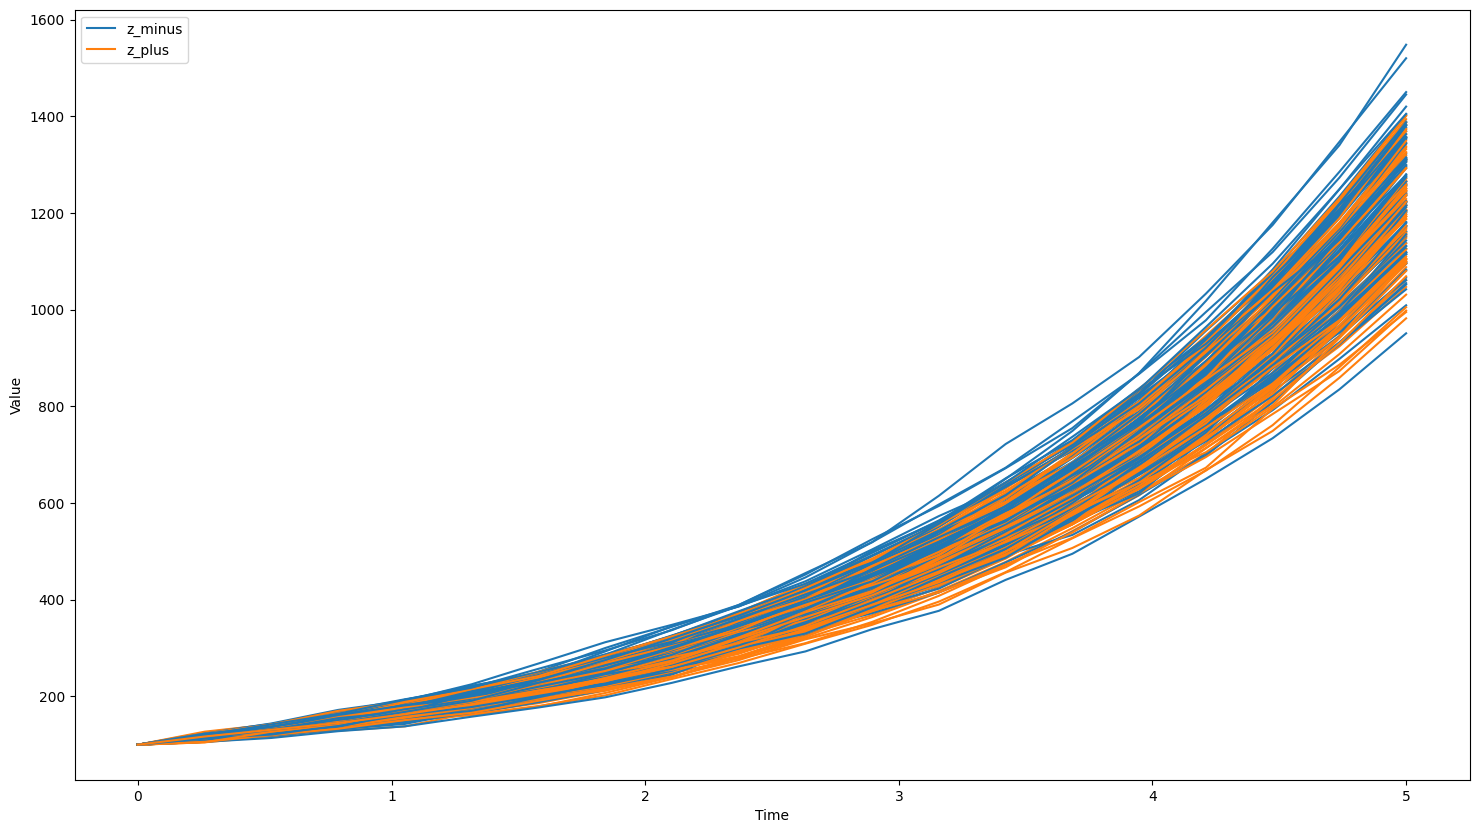

In [81]:
switching_results.plot()

In [74]:
results_avg = switching_results.average_ensemble() 
results_stddev = switching_results.stddev_ensemble()

In [75]:
results_avg['z_minus'][-1], results_stddev['z_minus'][-1]

(13.53, 11.138630975124364)

In [77]:
np.exp(.5 * 5),np.sqrt(np.exp(.5 * 5) * (np.exp(.5 * 5) - 1))

(12.182493960703473, 11.671789286217992)

In [70]:
type(np.array(results_avg['z_minus']))

numpy.ndarray

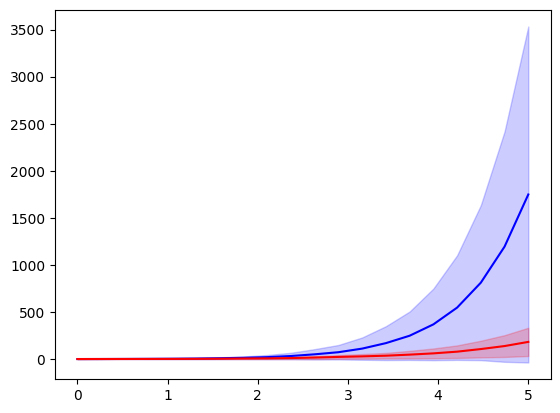

In [54]:
plt.plot(results_avg['time'],results_avg['z_minus'], '-', color = 'blue')
plt.plot(results_avg['time'],results_avg['z_plus'], '-', color = 'red')
plt.fill_between(results_avg['time'], np.array(results_avg['z_minus']) - np.array(results_stddev['z_minus']), np.array(results_avg['z_minus']) + np.array(results_stddev['z_minus']), color = 'blue', alpha = 0.2)
plt.fill_between(results_avg['time'], np.array(results_avg['z_plus']) - np.array(results_stddev['z_plus']), np.array(results_avg['z_plus']) + np.array(results_stddev['z_plus']), color = 'red', alpha = 0.2)

In [ ]:
print(results_stddev['z_minus'])
print(results_avg['z_minus'])
np.array(results_stddev['z_minus'])/np.array(results_avg['z_minus'])

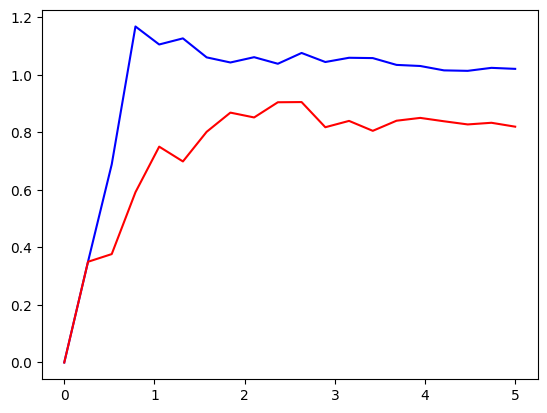

In [55]:
plt.plot(results_avg['time'],np.array(results_stddev['z_minus'])/np.array(results_avg['z_minus']), color = 'blue')
plt.plot(results_avg['time'],np.array(results_stddev['z_plus'])/np.array(results_avg['z_plus']), color = 'red')

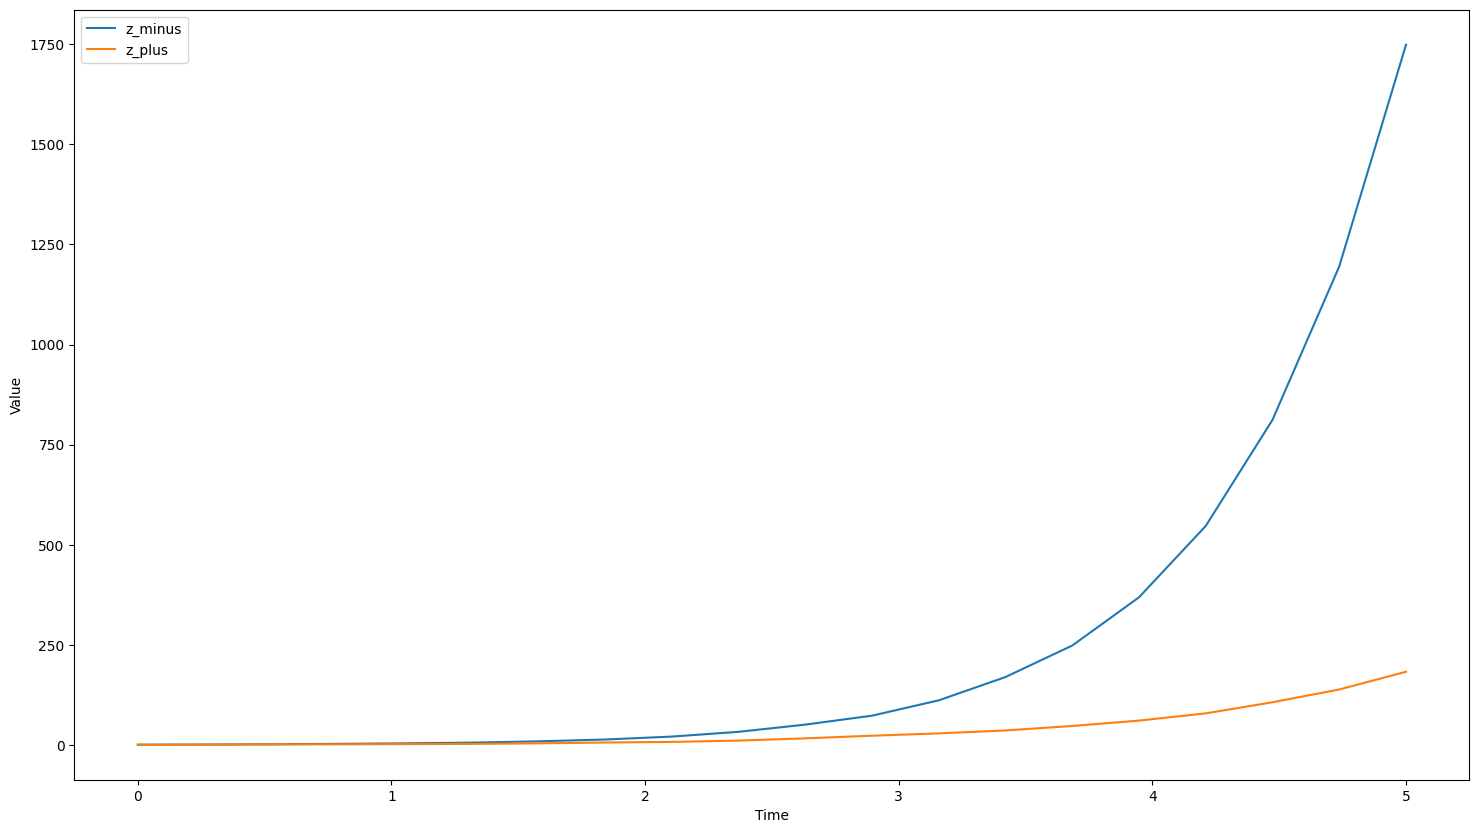

In [56]:
results_avg.plot()

In [29]:
switching_results[0]

{'time': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ]), 'z_minus': array([    1.,     1.,     1.,     1.,     1.,     1.,     1.,     1.,
           1.,     1.,     1.,     1.,     1.,     1.,     1.,     1.,
           1.,     1.,     1.,   

In [33]:
results_avg.to_array()

array([[[       0.  ,        1.  ,        1.  ],
        [       0.01,        1.1 ,        1.1 ],
        [       0.02,        1.3 ,        1.2 ],
        [       0.03,        1.4 ,        1.4 ],
        [       0.04,        1.4 ,        1.5 ],
        [       0.05,        1.4 ,        1.6 ],
        [       0.06,        1.6 ,        2.  ],
        [       0.07,        1.9 ,        2.3 ],
        [       0.08,        2.2 ,        2.7 ],
        [       0.09,        2.6 ,        2.9 ],
        [       0.1 ,        3.2 ,        3.  ],
        [       0.11,        3.5 ,        3.6 ],
        [       0.12,        3.9 ,        4.5 ],
        [       0.13,        4.4 ,        5.5 ],
        [       0.14,        5.  ,        6.4 ],
        [       0.15,        6.  ,        7.3 ],
        [       0.16,        6.8 ,        8.5 ],
        [       0.17,        7.8 ,        9.8 ],
        [       0.18,       10.  ,       11.9 ],
        [       0.19,       11.2 ,       13.6 ],
        [       0.2 

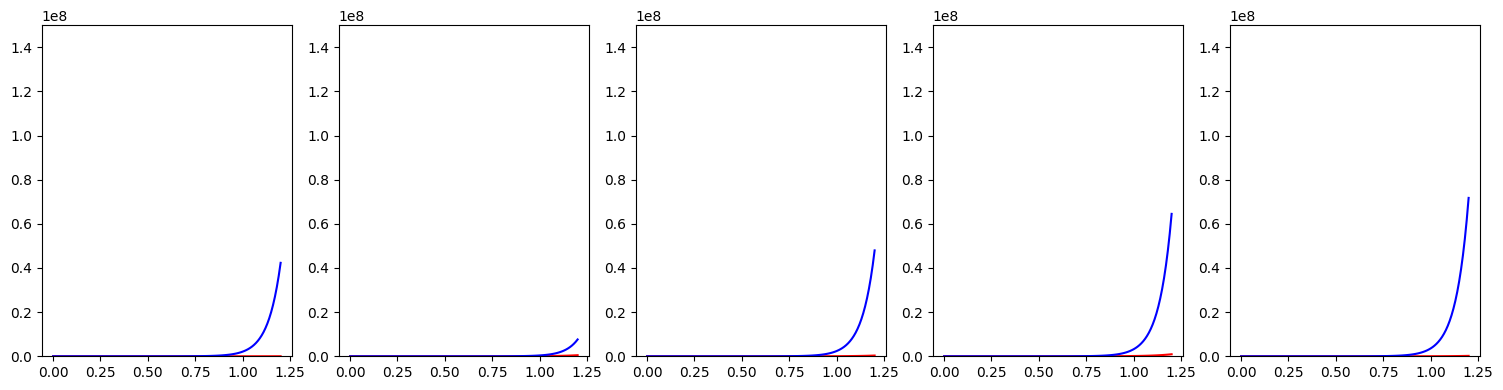

In [14]:
fig,axs = plt.subplots(1,5, figsize=(15,4))
for i in range(0,5):
        axs[i].plot(switching_results[i]['time'], switching_results[i]['z_minus'], 'r')
        axs[i].plot(switching_results[i]['time'], switching_results[i]['z_plus'], 'b')
        axs[i].set_ylim(0,1.5e8)
        #axs[i,j].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
fig.tight_layout() 

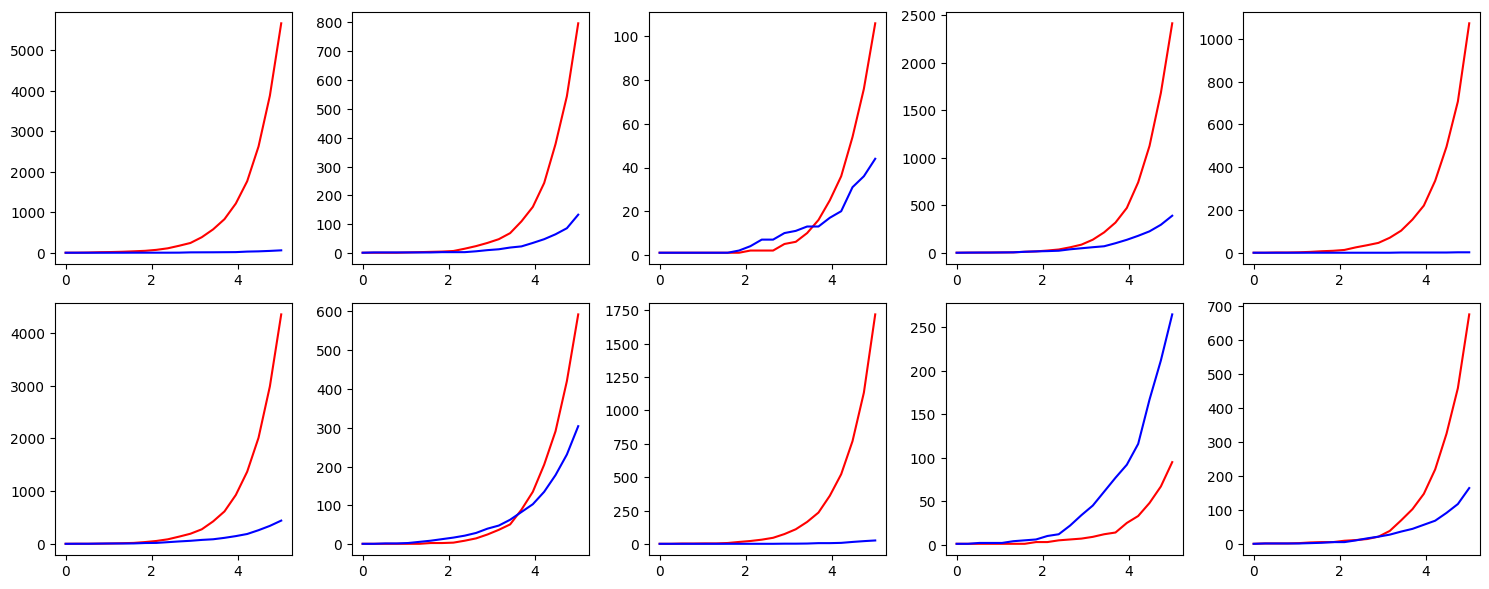

In [58]:
fig,axs = plt.subplots(2,5, figsize=(15,6))
for j in range(0,2):
    for i in range(0,5):
        axs[j,i].plot(switching_results[5*j+i]['time'], switching_results[i+j*5]['z_minus'], 'r')
        axs[j,i].plot(switching_results[5*j+i]['time'], switching_results[i+j*5]['z_plus'], 'b')
        #axs[j,i].set_ylim(0,2e8)
        #axs[i,j].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
fig.tight_layout() 

In [16]:
for i in range(0,10):
    df = pd.DataFrame(switching_results.to_array()[i], columns=['time', 'z_minus', 'z_plus'])
    df.to_csv('./Gillespy2/no_switching_results_15_10_{}.csv'.format(i))

In [35]:
df_avg = pd.DataFrame(results_avg.to_array()[0], columns=['time', 'z_minus', 'z_plus'])

In [36]:
df_avg

,time,z_minus,z_plus
0,0.00,1.0,1.0
1,0.01,1.1,1.1
2,0.02,1.3,1.2
3,0.03,1.4,1.4
4,0.04,1.4,1.5
...,...,...,...
116,1.16,167421.8,26903569.3
117,1.17,185116.9,31258108.2
118,1.18,204610.9,36316285.7
119,1.19,226176.2,42194066.3


In [37]:
df_avg.to_csv('./Gillespy2/no_switching_results_15_10_avg.csv')